In [7]:
import pandas as pd

import numpy as np

from scipy import stats



# Load the dataset

file_path = "Q1_property.csv"

df = pd.read_csv(file_path, delimiter=';')



# Ensure the validation and correction of any inconsistent data formats

# Example: Convert date_added to datetime

df['date_added'] = pd.to_datetime(df['date_added'])



# Identify and address missing values in the dataset

# Example: Handle missing values for numeric columns

numeric_columns = df.select_dtypes(include=np.number).columns

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())



# Identify and manage potential outliers within the data

# Example: Outlier detection using Z-score and replacing outliers with NaN

z_scores = np.abs(stats.zscore(df[numeric_columns]))

outlier_threshold = 3  # Adjust the threshold based on your data

df[numeric_columns][(z_scores < outlier_threshold).all(axis=1)]  # Display rows without outliers

df[numeric_columns][(z_scores >= outlier_threshold).any(axis=1)]  # Display rows with outliers



# Handle outliers (replace with NaN in this example)



df[numeric_columns][(z_scores >= outlier_threshold)] = np.nan





df

C:\Users\bilal\AppData\Local\Temp\ipykernel_25976\2380982539.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns][(z_scores >= outlier_threshold)] = np.nan
C:\Users\bilal\AppData\Local\Temp\ipykernel_25976\2380982539.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns][(z_scores >= outlier_threshold)] = np.nan


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,2019-07-17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,2018-10-06,Khan Estate,mohsinkhan and B
2,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,2019-07-03,Shahum Estate 2,"Babar Hameed, Raja Omar"
3,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,2019-04-04,NaN,NaN
4,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,2019-04-04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191388,17468383,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,70000,I-8,Islamabad,Islamabad Capital,33.668497,73.074160,0,12.4 Marla,For Rent,3,2019-07-24,Property World,Zafran
191389,17468384,174,https://www.zameen.com/Property/islamabad_i_8_...,Upper Portion,40000,I-8,Islamabad,Islamabad Capital,33.668497,73.074160,0,12.4 Marla,For Rent,2,2019-07-24,Property World,Zafran
191390,17468482,167,https://www.zameen.com/Property/islamabad_g_10...,House,160000,G-10,Islamabad,Islamabad Capital,33.676104,73.013842,6,1 Kanal,For Rent,6,2019-07-24,Azaan Associates,Usman Rehman
191391,17468586,339,https://www.zameen.com/Property/dha_defence_dh...,Flat,25000,DHA Defence,Islamabad,Islamabad Capital,33.527944,73.161392,2,2.7 Marla,For Rent,2,2019-07-24,New National Properties,TALHA MIAN AHMAD


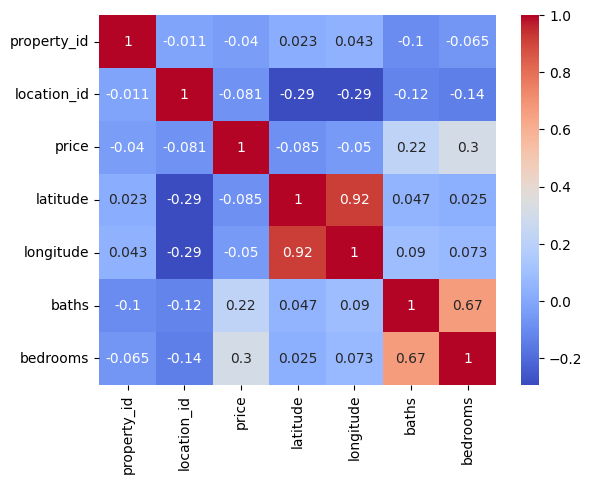

prices
year
2018    1.432274e+07
2019    1.659253e+07
Name: price, dtype: float64
column
Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent', 'year'],
      dtype='object')


In [8]:

# Import necessary libraries for EDA

import seaborn as sns

import matplotlib.pyplot as plt



# Select numeric columns

numeric_columns = df.select_dtypes(include=np.number)



# Explore correlation structure for numeric columns

correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()



# Assuming df is your DataFrame with 'price' and 'year' columns

# Assuming df is your DataFrame with 'price' and 'date_added' columns

df['year'] = df['date_added'].dt.year

annual_average_price = df.groupby('year')['price'].mean()

print('prices')

print(annual_average_price)

# Print the current column names in your DataFrame

# Print the current column names in your DataFrame

# Print the current column names in your DataFrame

print('column')



print(df.columns)









In [9]:

# Drop specified columns

columns_to_drop = ['page_url', 'latitude', 'longitude', 'location', 'date_added', 'agency', 'location_id', 'agent', 'property_id']

df = df.drop(columns=columns_to_drop, axis=1)

df

,property_type,price,city,province_name,baths,area,purpose,bedrooms,year
0,House,220000000,Lahore,Punjab,0,6 Kanal,For Sale,0,2019
1,House,40000000,Lahore,Punjab,5,1 Kanal,For Sale,5,2018
2,House,9500000,Lahore,Punjab,0,9 Marla,For Sale,3,2019
3,House,125000000,Lahore,Punjab,7,1 Kanal,For Sale,8,2019
4,House,21000000,Lahore,Punjab,5,11 Marla,For Sale,6,2019
...,...,...,...,...,...,...,...,...,...
191388,Upper Portion,70000,Islamabad,Islamabad Capital,0,12.4 Marla,For Rent,3,2019
191389,Upper Portion,40000,Islamabad,Islamabad Capital,0,12.4 Marla,For Rent,2,2019
191390,House,160000,Islamabad,Islamabad Capital,6,1 Kanal,For Rent,6,2019
191391,Flat,25000,Islamabad,Islamabad Capital,2,2.7 Marla,For Rent,2,2019


In [10]:

# Assuming 'price', 'baths', 'area', and 'bedrooms' are numeric columns

selected_columns = ['price', 'baths', 'area', 'bedrooms']



# Select the relevant subset of columns

numeric_data = df[selected_columns]



# Convert numeric_data to numeric values, handling non-numeric entries gracefully

numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')



# Check for any remaining non-numeric values

non_numeric_values = numeric_data[~numeric_data.applymap(np.isreal).all(1)]



# If there are non-numeric values, handle them accordingly (e.g., replace or drop)

# For simplicity, let's drop rows with non-numeric values

numeric_data = numeric_data.drop(non_numeric_values.index)



# Compute the correlation matrix

correlation_matrix = numeric_data.corr()



# Explore correlation_matrix and identify high or low correlations

print(correlation_matrix)



C:\Users\bilal\AppData\Local\Temp\ipykernel_25976\570282320.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_values = numeric_data[~numeric_data.applymap(np.isreal).all(1)]


             price     baths  area  bedrooms
price     1.000000  0.219297   NaN  0.303069
baths     0.219297  1.000000   NaN  0.669057
area           NaN       NaN   NaN       NaN
bedrooms  0.303069  0.669057   NaN  1.000000


In [11]:

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression



# Assuming 'df' is your original DataFrame







# Extract features and target variable

X = df.drop('price', axis=1)

y = df['price']



# Sample a smaller subset of your data if needed



# Perform one-hot encoding on the sampled data

X_encoded = pd.get_dummies(X)



# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



# Choose a regression model and train it

model = LinearRegression()





model.fit(X_train, y_train)



LinearRegression()

In [12]:

from sklearn.metrics import r2_score



# Make predictions on the test set

y_pred = model.predict(X_test)



# Evaluate the model

mse = mean_squared_error(y_test, y_pred)

rmse = mean_squared_error(y_test, y_pred, squared=False)

r2 = r2_score(y_test, y_pred)




# Print or use the metrics as needed

print(f'Mean Squared Error: {mse}')

print(f'Root Mean Squared Error: {rmse}')

print(f'R-squared (R2) Score: {r2}')



NameError: name 'mean_squared_error' is not defined

Q2 

In [13]:

# Importing necessary libraries

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report



# Part 1: Load the dataset

data = pd.read_csv("Q2_Fraud_check.csv")

data







,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [14]:

# Display the first few rows of the dataset

data.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [15]:

# Part 1: Load the dataset

data = pd.read_csv("Q2_Fraud_check.csv")

data = data.copy()  # Resolve SettingWithCopyWarning



# Display column names to check for correctness

print(data.columns)



# Part 2: Feature Engineering



# Clean up column names (remove leading/trailing whitespaces)

data.columns = data.columns.str.strip()



# Categorical Variable Handling

categorical_columns = ['Undergrad', 'Marital.Status', 'Urban']

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)



# Target Variable Transformation

data['Taxable.Income'] = data['Taxable.Income'].apply(lambda x: 0 if x <= 30000 else 1)



# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['Work.Experience', 'City.Population']] = scaler.fit_transform(data[['Work.Experience', 'City.Population']])



# Display the updated dataset

data.head()



Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')


,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,1,0.139472,0.333333,False,False,True,True
1,1,0.622394,0.600000,True,False,False,True
2,1,0.772568,1.000000,False,True,False,True
3,1,0.962563,0.500000,True,False,True,True
4,1,0.010081,0.933333,False,True,False,False


In [16]:

# Part 3: Data Splitting

X = data.drop('Taxable.Income', axis=1)

y = data['Taxable.Income']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train

X_test

y_train

y_test

110    0
419    1
565    1
77     1
181    0
      ..
399    1
340    1
148    1
494    1
439    0
Name: Taxable.Income, Length: 120, dtype: int64

In [17]:

# Part 4: Model Training and Evaluation

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)



# Predictions on the test set

y_pred = model.predict(X_test)



# Classification report

report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.15      0.17        26
           1       0.78      0.81      0.79        94

    accuracy                           0.67       120
   macro avg       0.48      0.48      0.48       120
weighted avg       0.65      0.67      0.66       120



In [18]:

from sklearn.model_selection import GridSearchCV



# Define the hyperparameters to tune

param_grid = {

    'max_depth': [3, 5, 7, 10],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 2, 4]

}



# Create the Decision Tree classifier

base_model = DecisionTreeClassifier(random_state=42)



# Instantiate GridSearchCV

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, 



            scoring='accuracy', cv=5, verbose=1, n_jobs=-1)



# Fit the grid search to the data

grid_search.fit(X_train, y_train)



# Get the best parameters from the grid search

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)



# Train the model with the best hyperparameters

tuned_model = DecisionTreeClassifier(random_state=42, **best_params)

tuned_model.fit(X_train, y_train)



# Evaluate the tuned model on the test set

y_pred_tuned = tuned_model.predict(X_test)

report_tuned = classification_report(y_test, y_pred_tuned)

print("Tuned Model Classification Report:\n", report_tuned)















Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      0.99      0.87        94

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120

